In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
cd /content/drive/MyDrive/Self/00. Courses/Machine Learning A-Z™ Hands-On Python _ R In Data Science/00. My code/09 Support Vector Regression (SVR)

/content/drive/MyDrive/Self/00. Courses/Machine Learning A-Z™ Hands-On Python _ R In Data Science/00. My code/09 Support Vector Regression (SVR)


# Support Vector Regression (SVR)

## Importing the libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [59]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [60]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [61]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [62]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [63]:
Y = Y.reshape(len(Y), 1)

In [64]:
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

Split into 2 scaler so that we can reverse later

In [65]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [66]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [67]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [74]:
Y = Y.ravel()

In [75]:
print(Y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


## Training the SVR model on the whole dataset

In [76]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

The input must be the same scale as X

In [77]:
scaled_prediction = regressor.predict(sc_X.transform([[3.5]]))
print(sc_Y.inverse_transform(scaled_prediction))

[98851.5386261]


## Visualising the SVR results

In [78]:
X = sc_X.inverse_transform(X)
Y = sc_Y.inverse_transform(Y)

In [79]:
print(X)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [80]:
print(Y)

[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]


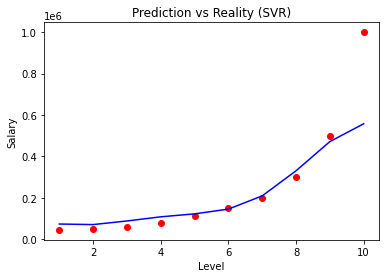

In [81]:
plt.scatter(X, Y, color='red')

prediction = sc_Y.inverse_transform(regressor.predict(sc_X.transform(X)))
plt.plot(X, prediction, color='blue')
plt.title('Prediction vs Reality (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()